In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
from sklearn.model_selection import train_test_split

In [2]:
data=pd.read_csv("diabetes_prediction_dataset.csv")

In [3]:
data.head(6)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
5,Female,20.0,0,0,never,27.32,6.6,85,0


In [4]:
data.shape

(100000, 9)

In [5]:
data.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [7]:
data['smoking_history'].replace('No Info', np.nan, inplace=True)
data['smoking_history'].fillna(method='ffill', inplace=True)

In [8]:
data.shape

(100000, 9)

In [9]:
data['smoking_history'].value_counts()

never          54603
former         14647
current        14427
not current    10062
ever            6261
Name: smoking_history, dtype: int64

In [10]:
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,never,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


C:\Users\LenoVo G\AppData\Local\Temp\ipykernel_4668\2227774053.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = data.corr()


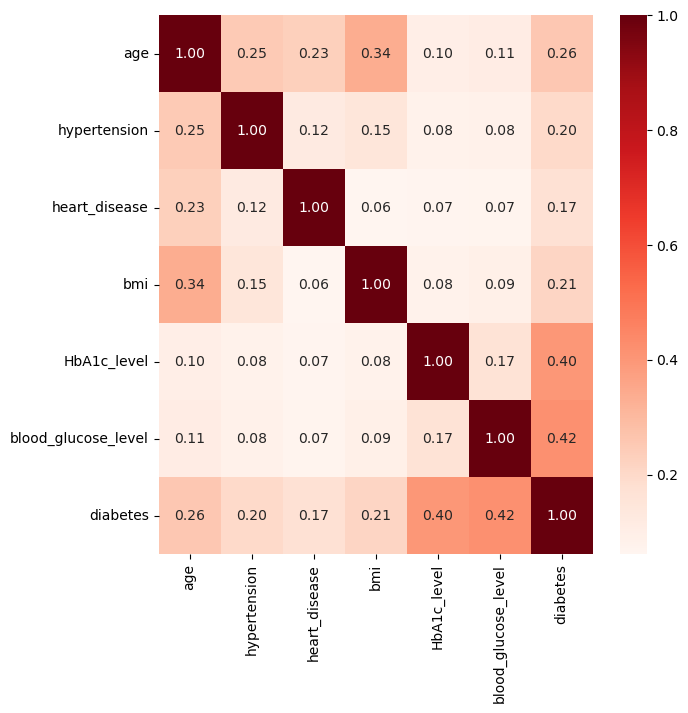

In [11]:
plt.figure(figsize=(7,7))
cor = data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds, fmt='.2f');

In [13]:
data_adj=pd.get_dummies(data,columns=["gender","smoking_history"])

In [14]:
data_adj.head(5)

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Female,gender_Male,gender_Other,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,80.0,0,1,25.19,6.6,140,0,1,0,0,0,0,0,1,0
1,54.0,0,0,27.32,6.6,80,0,1,0,0,0,0,0,1,0
2,28.0,0,0,27.32,5.7,158,0,0,1,0,0,0,0,1,0
3,36.0,0,0,23.45,5.0,155,0,1,0,0,1,0,0,0,0
4,76.0,1,1,20.14,4.8,155,0,0,1,0,1,0,0,0,0


In [15]:
X=data_adj.drop(columns=['diabetes'])
y=data_adj['diabetes']

In [16]:
X.shape

(100000, 14)

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [19]:
# Train the SVM model
svm = SVC(kernel='linear', C=1.0, random_state=42)
svm.fit(X_train, y_train)

# Make predictions
y_pred = svm.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9591


In [20]:
from sklearn.feature_selection import SelectKBest, f_classif

# Apply SelectKBest class to extract top 10 features
bestfeatures = SelectKBest(score_func=f_classif, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

# Concat two dataframes for better visualization and select features
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Feature','Score']
print(featureScores.nlargest(10,'Score'))  # print 10 best features

                   Feature         Score
5      blood_glucose_level  21363.054361
4              HbA1c_level  19122.211184
0                      age   7131.405852
3                      bmi   4816.113932
1             hypertension   4072.706875
2            heart_disease   3038.559564
11  smoking_history_former    318.951190
7              gender_Male    142.073969
6            gender_Female    141.215894
12   smoking_history_never    140.047970


In [21]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the testing set
predictions = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)


Accuracy: 0.9586


In [22]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Make predictions
y_pred = rf_classifier.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9697333333333333


In [23]:
# Create the XGBoost classifier
xgb_classifier = xgb.XGBClassifier(objective="multi:softmax", num_class=3, random_state=42)

# Train the classifier
xgb_classifier.fit(X_train, y_train)

# Make predictions
y_pred = xgb_classifier.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9708666666666667


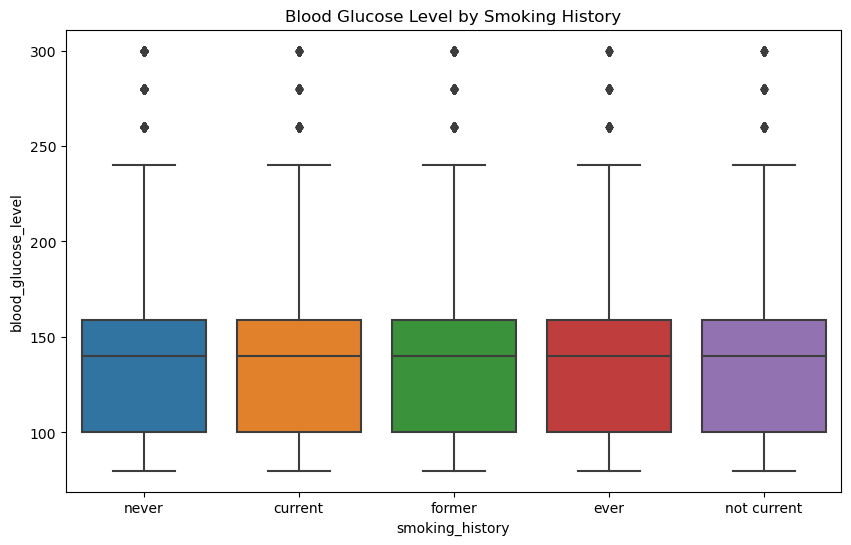

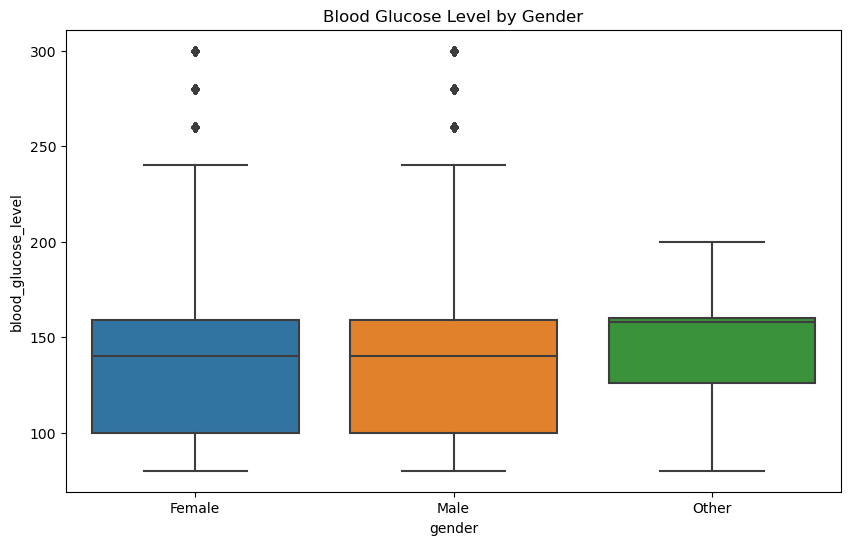

In [24]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='smoking_history', y='blood_glucose_level', data=data)
plt.title('Blood Glucose Level by Smoking History')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='gender', y='blood_glucose_level', data=data)
plt.title('Blood Glucose Level by Gender')
plt.show()

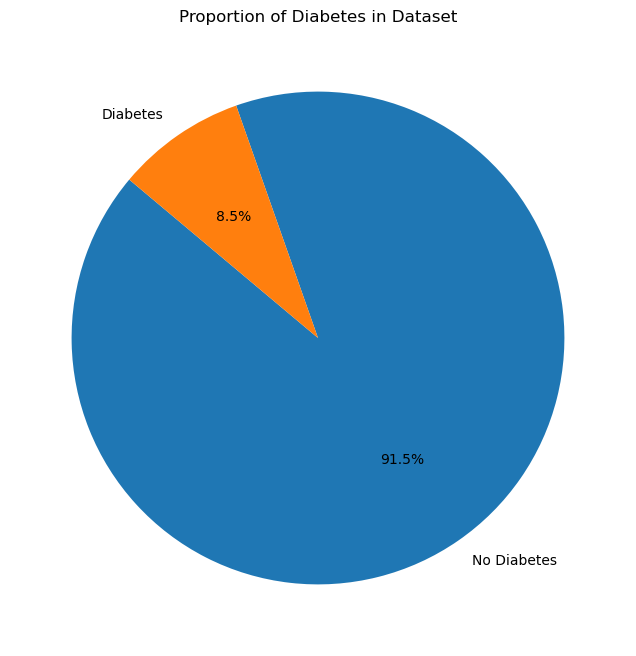

In [25]:
diabetes_counts = data['diabetes'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(diabetes_counts, labels=['No Diabetes', 'Diabetes'], autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Diabetes in Dataset')
plt.show()


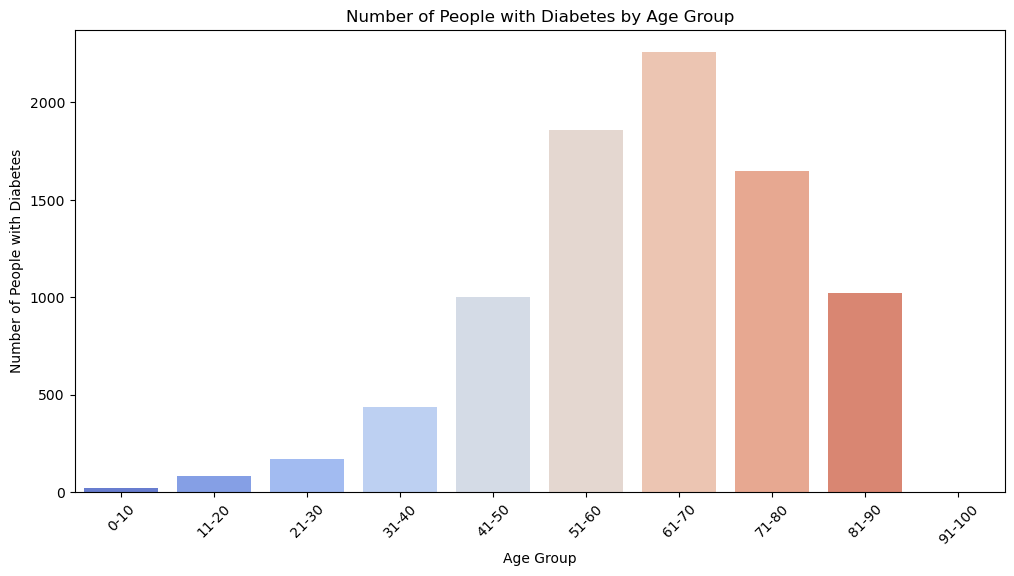

In [26]:
# Define age bins
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']
data['age_group'] = pd.cut(data['age'], bins=bins, labels=labels, right=False)

# Create a DataFrame with counts of diabetes occurrences by age group
diabetes_by_age_group = data[data['diabetes'] == 1].groupby('age_group').size().reset_index(name='counts')

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x='age_group', y='counts', data=diabetes_by_age_group, palette='coolwarm')
plt.title('Number of People with Diabetes by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of People with Diabetes')
plt.xticks(rotation=45)  # This ensures that the age group labels are not overlapping
plt.show()


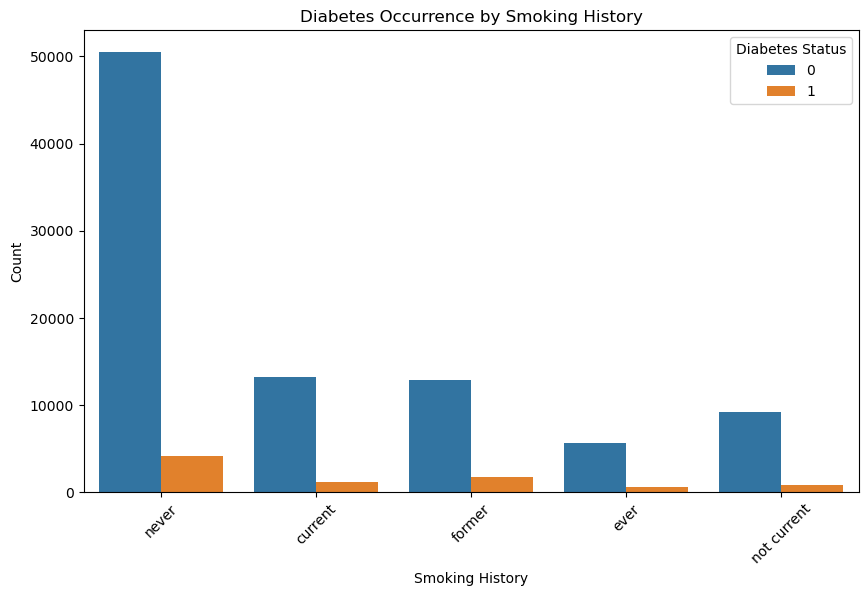

In [12]:
plt.figure(figsize=(10, 6))
sns.countplot(x='smoking_history', hue='diabetes', data=data)
plt.title('Diabetes Occurrence by Smoking History')
plt.xlabel('Smoking History')
plt.ylabel('Count')
plt.legend(title='Diabetes Status')
plt.xticks(rotation=45)
plt.show()
